[[1.         0.03495775]
 [0.03495775 1.        ]]


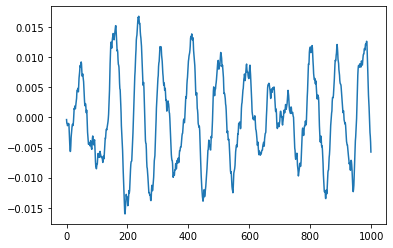

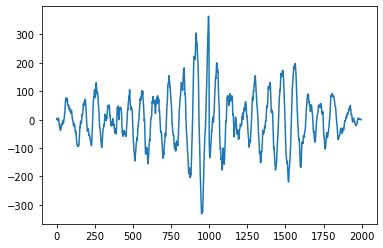

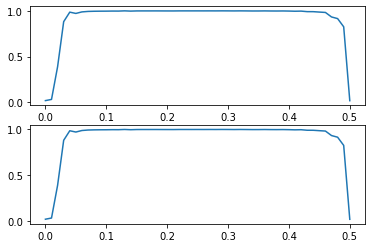

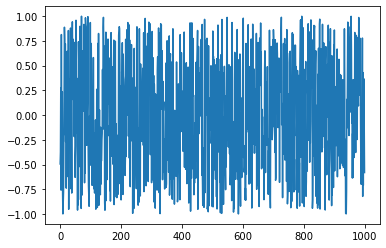

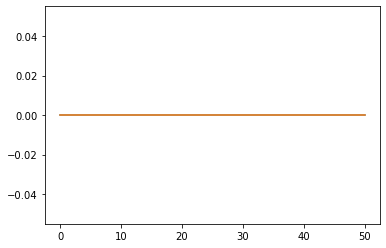

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

Q = 50
N =1000

noise1 = np.random.uniform(-1,1,N)
noise2 = np.random.uniform(-1,1,N)
noise3 = np.random.uniform(-1,1,N)
b,a = signal.iirfilter(1,[2*500*(1-1/(2*Q))/44100,2*500*(1+1/(2*Q))/44100])
w, h = signal.freqz(b,a)
gain = np.abs(np.max(h))
output = signal.lfilter(b,a,noise1)
#output /= np.max(output)

correlation1 = signal.correlate(noise1, output) / np.sqrt(np.var(noise1)) / np.sqrt(np.var(output)) / gain
print(np.corrcoef(noise1, output))
#correlation1 /= np.max(correlation1)

correlation2 = signal.correlate(noise2, output)
#correlation2 /= np.max(correlation2)

correlation3 = signal.correlate(noise3, output)
#correlation3 /= np.max(correlation3)

f1, coherence1 = signal.coherence(noise1, output, nperseg=N/10)
f2, coherence2 = signal.coherence(noise2, output, nperseg=N/10)
f3, coherence3 = signal.coherence(noise3, output, nperseg=N/10)
f4, coherence4 = signal.coherence(noise3, noise1, nperseg=N/10)
f5, coherence5 = signal.coherence(noise1+10*np.sin(2*np.pi*np.arange(N)*0.4), noise1, nperseg=N/10)
f1a, coherence1a = signal.coherence(output, noise1, nperseg=N/10)

fig1 = plt.figure(1)
fig1.patch.set_facecolor('white')
plt.plot(output)

fig2 = plt.figure(2)
fig2.patch.set_facecolor('white')
plt.plot(correlation1)
#plt.plot(correlation2)
#plt.plot(correlation3)

fig3, axs3 = plt.subplots(2)
fig3.patch.set_facecolor('white')
axs3[0].plot(f1, coherence1)
# plt.plot(f1, np.abs(coherence2))
# plt.plot(f1, np.abs(coherence3))
# plt.plot(f1, np.abs(coherence4))
# plt.plot(f1, np.abs(coherence5))
axs3[1].plot(f1a , coherence1a )


fig4 = plt.figure(4)
plt.plot(noise1)
fig4.patch.set_facecolor('white')

fig5 = plt.figure(5)
plt.plot(np.angle(coherence1))
plt.plot(np.angle(coherence1a))
fig5.patch.set_facecolor('white')




[ 1.         -1.99350768  0.99857626]
[ 0.00071187  0.         -0.00071187]
0.28922812198207637


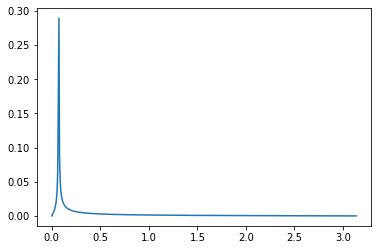

In [18]:
print(a)
print(b)
w, h = signal.freqz(b,a)
fig_filt = plt.figure(10)
plt.plot(w,np.abs(h))
fig_filt.patch.set_facecolor('white')
print(max(np.abs(h)))

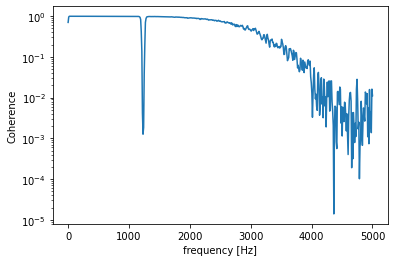

In [40]:
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()